In [1]:
import numpy as np

In [3]:
dogs = np.load('./full_numpy_bitmap_dog.npy')
elephants = np.load('./full_numpy_bitmap_elephant.npy')

In [4]:
X_train = np.concatenate((dogs, elephants), axis=0)

In [6]:
X_train.shape

(279128, 784)

In [7]:
X_train = X_train.reshape((X_train.shape[0],28,28))

In [8]:
X_train.shape

(279128, 28, 28)

In [9]:
dog_y = np.ones(len(dogs))
ele_y = np.zeros(len(elephants))
y_train = np.concatenate((dog_y, ele_y), axis=0)

In [10]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [11]:
X_train, y_train = unison_shuffled_copies(X_train, y_train)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

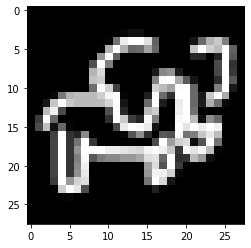

In [17]:
plt.imshow(elephants[500].reshape(28,28), cmap='gray')

In [22]:
X_train.shape

(279128, 28, 28)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, Flatten

In [34]:
def create_model():
    
    model = Sequential()
    model.add(Conv1D(4, (2), padding='same', activation='relu', input_shape=(28,28)))
    model.add(Conv1D(4, (2), activation='relu'))
    model.add(MaxPool1D(pool_size=(2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [ ]:
# Defined arch
# Next step in Keras is to COMPILE!.... 

model = create_model()
epochs = 100
batch_size = 32

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

W0917 12:41:07.009786 4503033280 deprecation.py:323] From /Users/jonathansokoll/anaconda3/envs/U4-S3-DNN/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 279128 samples
Epoch 1/100
279128/279128 [==============================] - 16s 56us/sample - loss: 4.8186 - accuracy: 0.6819
Epoch 2/100
279128/279128 [==============================] - 16s 59us/sample - loss: 4.1554 - accuracy: 0.7278
Epoch 3/100
279128/279128 [==============================] - 16s 59us/sample - loss: 3.9432 - accuracy: 0.7424
Epoch 4/100
279128/279128 [==============================] - 15s 55us/sample - loss: 3.8454 - accuracy: 0.7492
Epoch 5/100
279128/279128 [==============================] - 16s 57us/sample - loss: 3.9513 - accuracy: 0.7425
Epoch 6/100
279128/279128 [==============================] - 16s 58us/sample - loss: 4.0123 - accuracy: 0.7385
Epoch 7/100
279128/279128 [==============================] - 16s 58us/sample - loss: 3.8303 - accuracy: 0.7506
Epoch 8/100
279128/279128 [==============================] - 16s 56us/sample - loss: 3.9059 - accuracy: 0.7457
Epoch 9/100
279128/279128 [==============================] - 17s 60us/sample - loss: 3.9